In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as dates

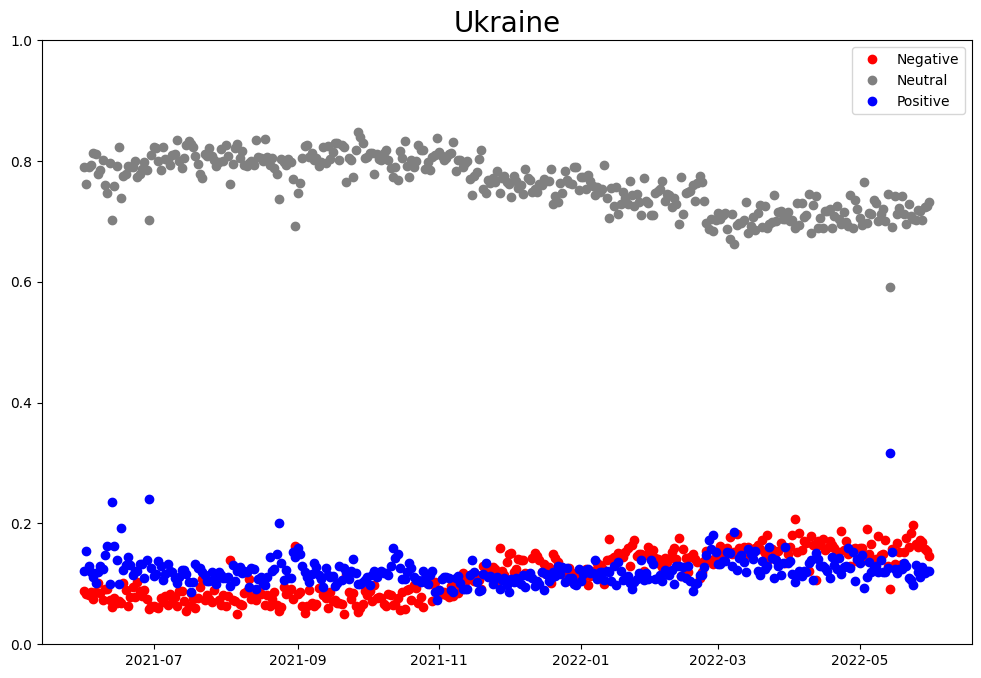

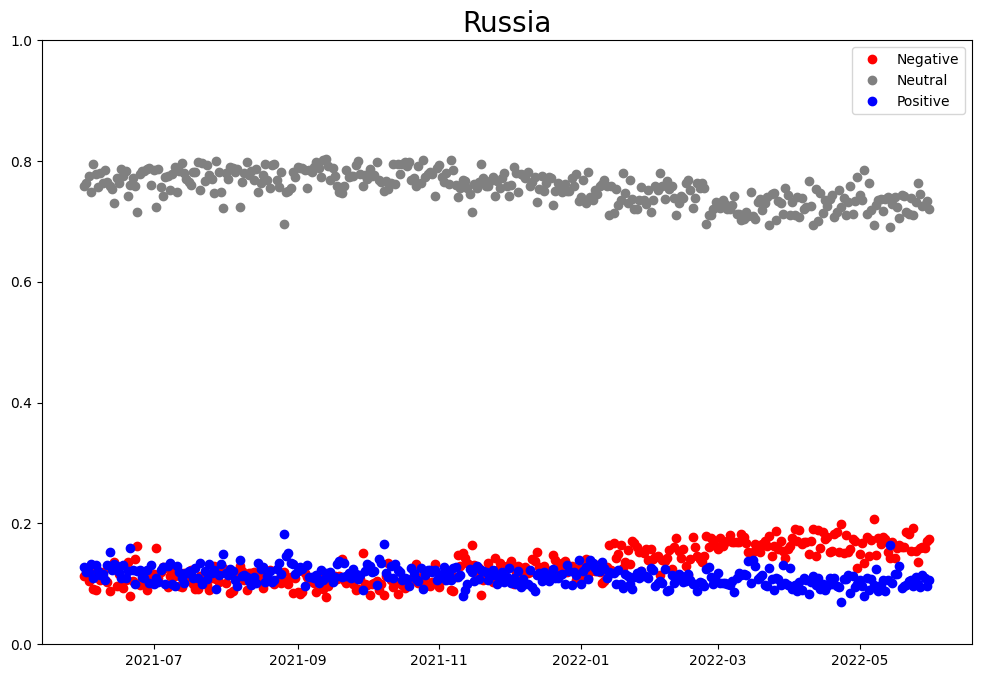

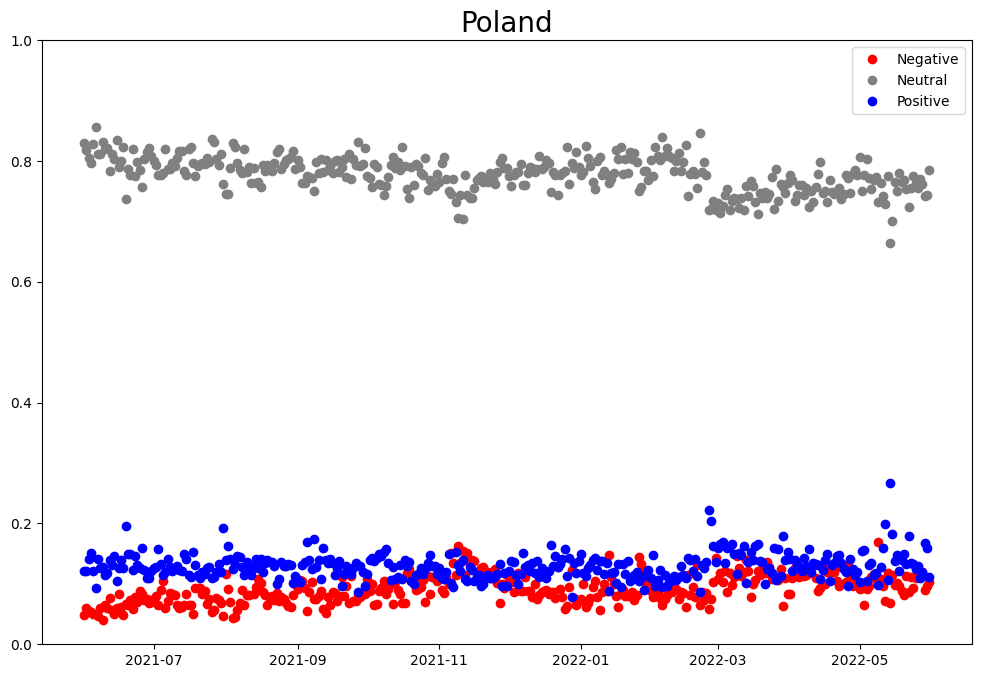

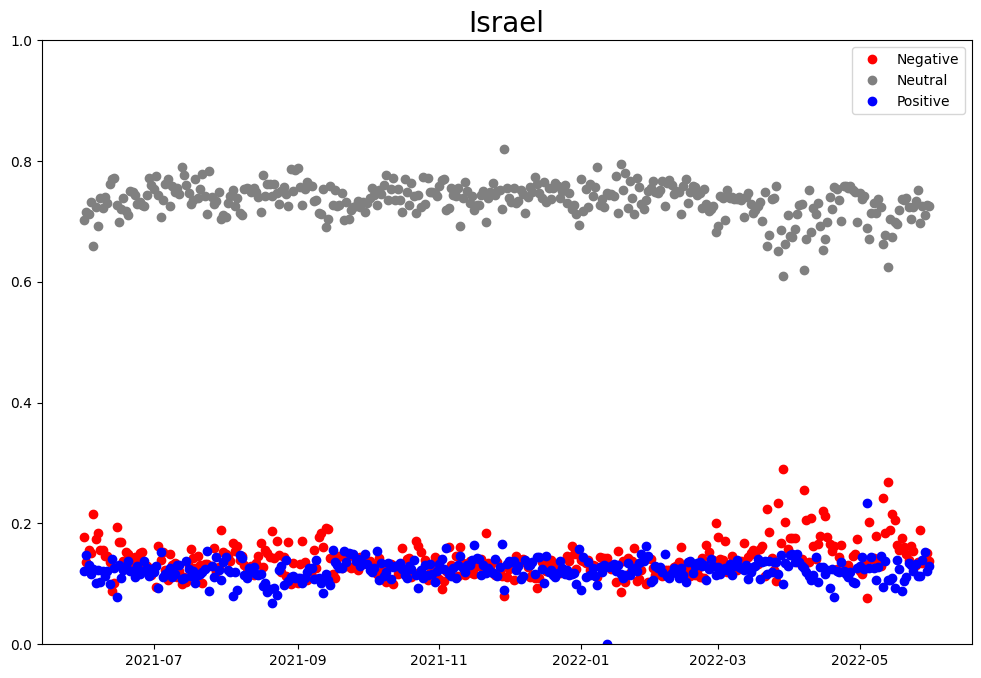

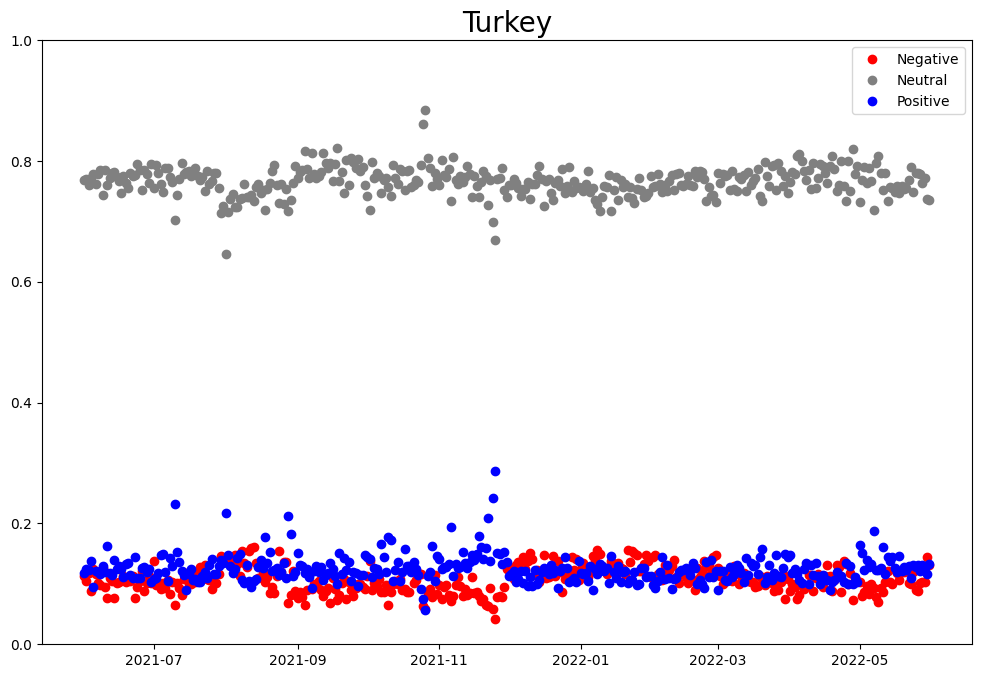

In [4]:
year = ["June", "July", "August","September", "October", "November", "December", "January", "February", "March", "April", "May"]
hashtags = ['Ukraine', 'Russia', 'Poland', 'Israel', 'Turkey']

for country in hashtags:
    data = []
    for month in year:
        with open("Tweets/" + month + "/" + country + "/Results/result.txt", "r") as txt_file:
            for line in txt_file:
                result = line.split(",")
                if (month in ["January", "February", "March", "April", "May"]):
                    time = 2022
                else:
                    time = 2021
                data.append([time, month, int(result[0]), float(result[1]), float(result[2]), float(result[3][:-3])])
            txt_file.close()

    df = pd.DataFrame(data, columns=['Year', 'Month', 'Day', 'Negative', 'Neutral', 'Positive'])

    df['date'] = df['Year'].map(str)+ '-' +df['Day'].map(str) + '-' +df['Month'].map(str)
    df['date'] = pd.to_datetime(df['date'], format='%Y-%d-%B').dt.strftime('%Y-%d-%B')
    df["date"] = pd.to_datetime(df["date"])
    df = df.sort_values(by="date")
    
    plt.rcParams['figure.figsize'] = [12, 8]
    plt.rcParams['figure.dpi'] = 100
    
    plt.plot_date(df['date'], df['Negative'], color = 'red')
    plt.plot_date(df['date'], df['Neutral'], color = 'grey')
    plt.plot_date(df['date'], df['Positive'], color = 'blue')
    plt.legend(['Negative', 'Neutral', 'Positive'])
    plt.title(country, size = 20)
    plt.ylim([0, 1])
    plt.savefig("Plots/" + country + ".jpg", dpi=500)
    plt.show()